In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# Load the IMDB dataset. It already contains preprocessed integer-encoded data.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# The dataset is represented as sequences of integers, where each integer represents a word in the vocabulary.

# Pad the sequences so that they are all the same length. This step is necessary for neural networks.
maxlen = 500 # We will consider the first 500 words in each review
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Training data shape: {x_train.shape}, Test data shape: {x_test.shape}")
     

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (25000, 500), Test data shape: (25000, 500)


In [3]:
model = models.Sequential()

# Embedding layer converts integer-encoded words to dense vectors of fixed size
model.add(layers.Embedding(input_dim=10000, output_dim=128, input_length=maxlen))

# Add a Flatten layer to flatten the output of the embedding layer into a 1D array
model.add(layers.GlobalAveragePooling1D())

# Add a Dense layer with ReLU activation function
model.add(layers.Dense(64, activation='relu'))

# Add a Dense layer with 1 output neuron, with sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

C:\python 3.10\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
#Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_test, y_test))
    

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.5266 - loss: 0.6906 - val_accuracy: 0.6152 - val_loss: 0.6668
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.6578 - loss: 0.6441 - val_accuracy: 0.6958 - val_loss: 0.5721
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.7583 - loss: 0.5290 - val_accuracy: 0.8219 - val_loss: 0.4488
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.8116 - loss: 0.4314 - val_accuracy: 0.6643 - val_loss: 0.6222
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.7723 - loss: 0.4720 - val_accuracy: 0.8074 - val_loss: 0.4034


In [6]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8109 - loss: 0.3987
Test Loss: 0.4033612012863159, Test Accuracy: 0.8073999881744385


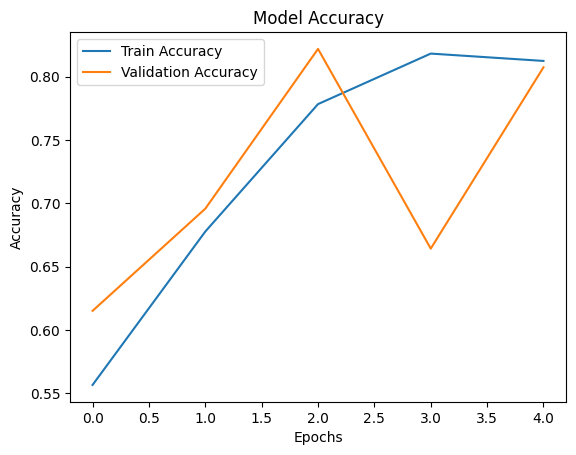

In [7]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

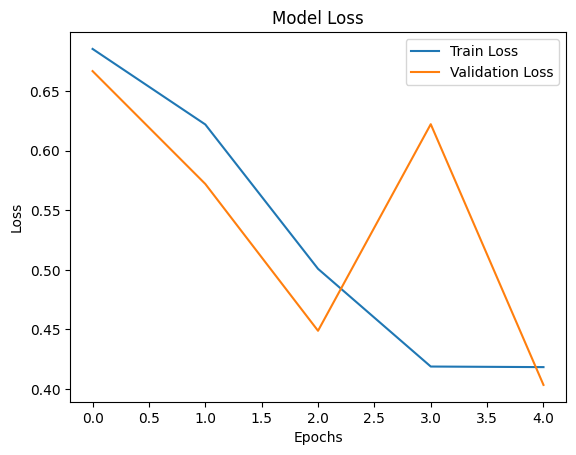

In [8]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Predict a single review
sample_review = x_test[0] # Take the first test sample
prediction = model.predict(sample_review.reshape(1, -1)) # Make a prediction for this sample
print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction: [[0.17046238]]
